In [ ]:
#_________________________________________________________________________________________________________________________#
#______________________________________________________Raven.ai___________________________________________________________#
#_________________________________________________________________________________________________________________________#

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# let's start by defining our model we need a weight and a bias randomly initialized, and call function computing the input x with our equation

class Model :
  def __init__(self):
    self.w = tf.Variable(16.0)
    self.b = tf.Variable(10.0)

  def __call__(self, x):
    return self.w * x + self.b      

In [ ]:
model = Model()
model(20)

<tf.Tensor: shape=(), dtype=float32, numpy=330.0>

In [ ]:
# define the true W and the true B that our regression will look for 
true_w = 3.0
true_b = 0.5
size = 500

In [ ]:
# generating a data sample with normalisation and noise
x = tf.random.normal(shape = (size,))
noise = tf.random.normal(shape =(size,))
y = x * true_w + true_b + noise

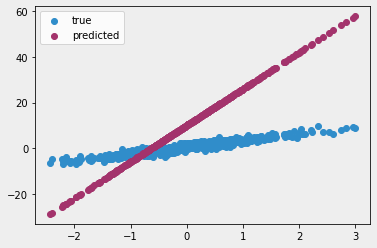

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor("#eeeeeeff")
# fig.patch.set_alpha(0.6)

ax = plt.axes()
ax.set_facecolor("#eeeeeeff")
plt.scatter(x, y, label="true", color = "#308DCA")
plt.scatter(x, model(x), label="predicted", color ="#A3336C")
plt.legend()

In [ ]:
#Our loss function MSE

def loss(y, y_pred):
  return tf.reduce_mean(tf.square(y - y_pred))


In [ ]:
# train function with gradient descent 

def train(model, x, y, lr = 0.01):
  with tf.GradientTape() as t:
    current_loss = loss(y, model(x))
  dw, db = t.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(lr * dw)
  model.b.assign_sub(lr * db)

In [ ]:
model = Model()
ws, bs =[], []
epochs = 100

In [ ]:
# Training loop
for epoch in range(epochs):
  ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  current_loss = loss(y, model(x))
  train(model, x, y,lr=0.1)
  print(f"epoch {epoch}: Loss: {current_loss.numpy()}")

epoch 0: Loss: 252.0554962158203
epoch 1: Loss: 164.35357666015625
epoch 2: Loss: 107.30573272705078
epoch 3: Loss: 70.18922424316406
epoch 4: Loss: 46.035064697265625
epoch 5: Loss: 30.31283950805664
epoch 6: Loss: 20.076786041259766
epoch 7: Loss: 13.411060333251953
epoch 8: Loss: 9.069382667541504
epoch 9: Loss: 6.240837574005127
epoch 10: Loss: 4.397677898406982
epoch 11: Loss: 3.1963629722595215
epoch 12: Loss: 2.4132144451141357
epoch 13: Loss: 1.9025636911392212
epoch 14: Loss: 1.5695240497589111
epoch 15: Loss: 1.3522746562957764
epoch 16: Loss: 1.2105278968811035
epoch 17: Loss: 1.1180249452590942
epoch 18: Loss: 1.0576457977294922
epoch 19: Loss: 1.0182263851165771
epoch 20: Loss: 0.9924860000610352
epoch 21: Loss: 0.9756744503974915
epoch 22: Loss: 0.964692234992981
epoch 23: Loss: 0.9575167298316956
epoch 24: Loss: 0.9528275728225708
epoch 25: Loss: 0.9497625827789307
epoch 26: Loss: 0.9477587938308716
epoch 27: Loss: 0.9464486241340637
epoch 28: Loss: 0.9455918073654175
ep

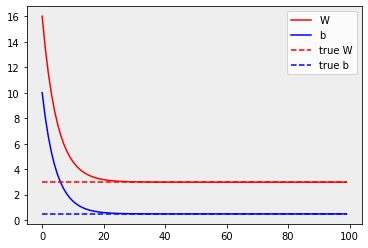

In [ ]:
ax = plt.axes()
ax.set_facecolor("#eeeeeeff")
plt.plot(range(epochs), ws, 'r', range(epochs), bs, 'b')
plt.plot([true_w] * epochs, 'r--', [true_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

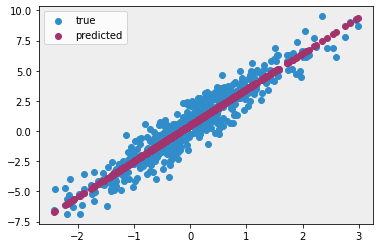

In [ ]:
ax = plt.axes()
ax.set_facecolor("#eeeeeeff")
plt.scatter(x, y, label="true", color ="#308DCA")
plt.scatter(x, model(x), label="predicted", color="#A3336C")
plt.legend()